**Descriptive Statistics:**
Descriptive statistics is the branch of statistics that summarizes and organizes the characteristics of a dataset using numerical and visual methods. It includes measures like mean, median, mode, standard deviation, quartiles, and graphs such as histograms and box plots to describe the data's distribution.

In [7]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [10]:
#load dataset. Iris dataset has 150 samples and 5 columns
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
# Basic Descriptive Statistics like Mean, Count, Standard Deviation, Min, Max, Quartiles
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
#Mode - Most Frequent Value
print("*******************")
print(f"Mode:\n {df.mode(numeric_only=True)}")
print("*******************")
# Median - Middle Value
print(f"Median:\n {df.median(numeric_only=True)}")
print("*******************")
# Std - Spread of values
print(f"Standard Deviation \n {df.std(numeric_only=True)}")


*******************
Mode:
   sepal_length  sepal_width  petal_length  petal_width
0           5.0          3.0           1.4          0.2
1           NaN          NaN           1.5          NaN
*******************
Median:
 sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64
*******************
Standard Deviation 
 sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64


**Quartile :**
Special Percentiles that split data into 4 equal parts
Q1 - 25%, Q2 - 50% , Q3 - 75%, Q4 - 100%

IQR:
Q3-Q1
1. Helps measure of data spread
2. Used to detect outliers
3. Ex:
4. Value below Q1 - 1.5 * IQR is an outlier
5. Value above Q3-Q1*IQR is an outlier *italicized text*

In [20]:
# Min, Max
print("*******************")
print(f"Min Value of dataset \n {df.min(numeric_only=True)}")
print("*******************")
print(f"Max Value of dataset \n {df.max(numeric_only=True)}")

Q1 = df.quantile(q=0.25,numeric_only=True)
Q3 = df.quantile(q=0.75,numeric_only=True)
print("*******************")
print(f"Quartile 1: Q1 \n {Q1}")
print("*******************")
print(f"Quartile 3: Q3  \n {Q3}")
print("*******************")

IQR = Q3 - Q1
print(f"InterQuartile IQR \n {IQR}")


*******************
Min Value of dataset 
 sepal_length    4.3
sepal_width     2.0
petal_length    1.0
petal_width     0.1
dtype: float64
*******************
Max Value of dataset 
 sepal_length    7.9
sepal_width     4.4
petal_length    6.9
petal_width     2.5
dtype: float64
*******************
Quartile 1: Q1 
 sepal_length    5.1
sepal_width     2.8
petal_length    1.6
petal_width     0.3
Name: 0.25, dtype: float64
*******************
Quartile 3: Q3  
 sepal_length    6.4
sepal_width     3.3
petal_length    5.1
petal_width     1.8
Name: 0.75, dtype: float64
*******************
InterQuartile IQR 
 sepal_length    1.3
sepal_width     0.5
petal_length    3.5
petal_width     1.5
dtype: float64


**Percentile** is a measure that indicates the value below which a given percentage of values fall.
1. P(k) = K/100 * (n+1)
2. k is the percentile below which values fall
3. n is number of observations

In [22]:
# 90th percentile value
print(f"90th Percentile Value \n{df.quantile(numeric_only=True)}")

90th Percentile Value 
sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
Name: 0.5, dtype: float64


/tmp/ipython-input-38-990701455.py:41: UserWarning:

Glyph 127800 (\N{CHERRY BLOSSOM}) missing from font(s) DejaVu Sans.

/tmp/ipython-input-38-990701455.py:41: UserWarning:

Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127800 (\N{CHERRY BLOSSOM}) missing from font(s) DejaVu Sans.



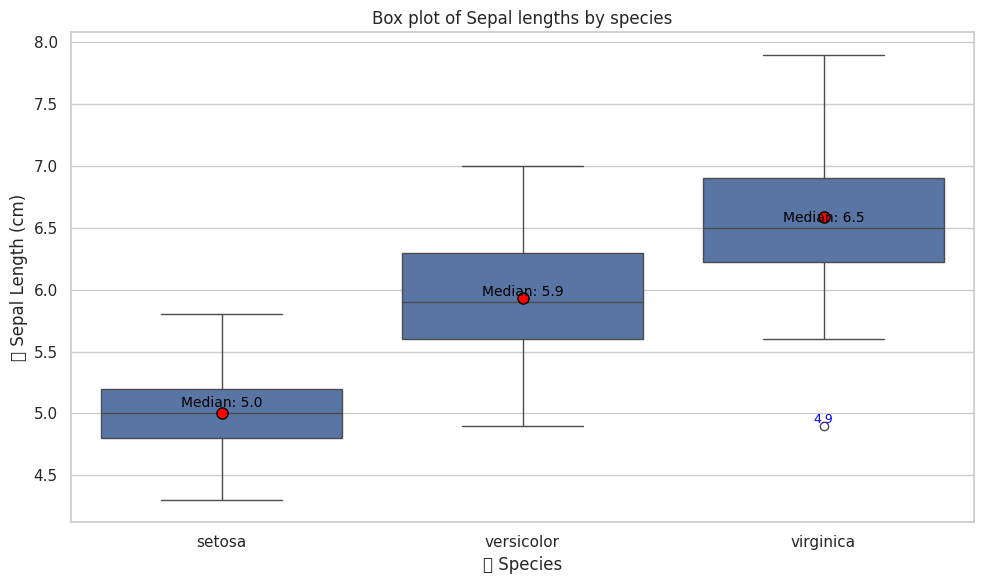

In [38]:
# Create a plot with 10 rows and 6 columns
plt.figure(figsize=(10,6))
# Optional : Set a white background
sns.set(style="whitegrid")
ax=sns.boxplot(
    x="species", # Categorical variable to show on X axis
    y="sepal_length", # Numerical variable to show on Y axis
    data=df, # Data Source
    showmeans=True, # Show the mean as a point
    meanprops={ # Optional: Customize the appearance mean point
        "marker": "o",
        "markerfacecolor": "red",
        "markeredgecolor": "black",
        "markersize": 8
    })
plt.title("Box plot of Sepal lengths by species")
# Set labels for X and Y axes
plt.xlabel("🌸 Species", fontsize=12)
plt.ylabel("📏 Sepal Length (cm)", fontsize=12)

# Loop through each species and annotate the median value above the box
for i, species in enumerate(df['species'].unique()):
  # find each species where df['species'] == Setosa and take its sepal_length column and find the column median
    median = df[df['species'] == species]['sepal_length'].median()
    # Add text above the median line in the plot
    ax.text(i, median + 0.05, f"Median: {median:.1f}", ha='center', color='black', fontsize=10)

    ## OPTIONAL : To Show the Outliers
    values = df[df['species'] == species]['sepal_length']
    Q1 = values.quantile(0.25)
    Q3 = values.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = values[(values < lower) | (values > upper)]

    for y in outliers:
        ax.text(i, y, f"{y:.1f}", color='blue', fontsize=9, ha='center', va='bottom')

# Adjust the layout so nothing is clipped
plt.tight_layout()
plt.show()

Plotly:
1. Using plotly we can hover over the values and also find the outliers

In [35]:
import plotly.express as px
fig = px.box(data_frame=df,x="species",y="sepal_length",color="species",title="Sepal Length distribution by Species",points="all")
fig.update_layout(
    yaxis_title="Sepal Length (cm)",
    xaxis_title="Iris Species",
    title_font_size=20,
    showlegend=False
)
fig.show()